<a href="https://colab.research.google.com/github/raulbenitez/CONCEPTOSCLAROS_AI_IMAGES/blob/main/Image_segmentation_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 2: MACHING LEARNING WITH PYTHON



Connect to drive content:

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


# Object Segmentation

## Image segmentation: Supervised vs unsupervised approaches

Let's consider an image segmentation problem in which we should identify a pattern from the background. In this case, we only have two classes of pixels: pixels belonging to the background and pixels belonging to the pattern of interest (vessels in an image of the retina).

In order to understand the different methods covered in this session, we are going to use two different images from a well known dataset on retinal vessel segmentation:

- **Training image** ('vessels_train.jpg'): The one we are using in order to design the sementation method
- **Test image** ('vessels_test.jpg'): The image we are going to use in order to test the previously designed segmentation approach

For each of the images we also have their corresponding ground truth sementation images obtained from an independent expert ('vessels_train_GT.tif' and 'vessels_test_GT.tif'). The ground truth images are going to be used only when constructing a supervised approach. We will also use the GT images as reference in order to quantify the performance of the sementation method. 

First we take a look to the image dataset: 

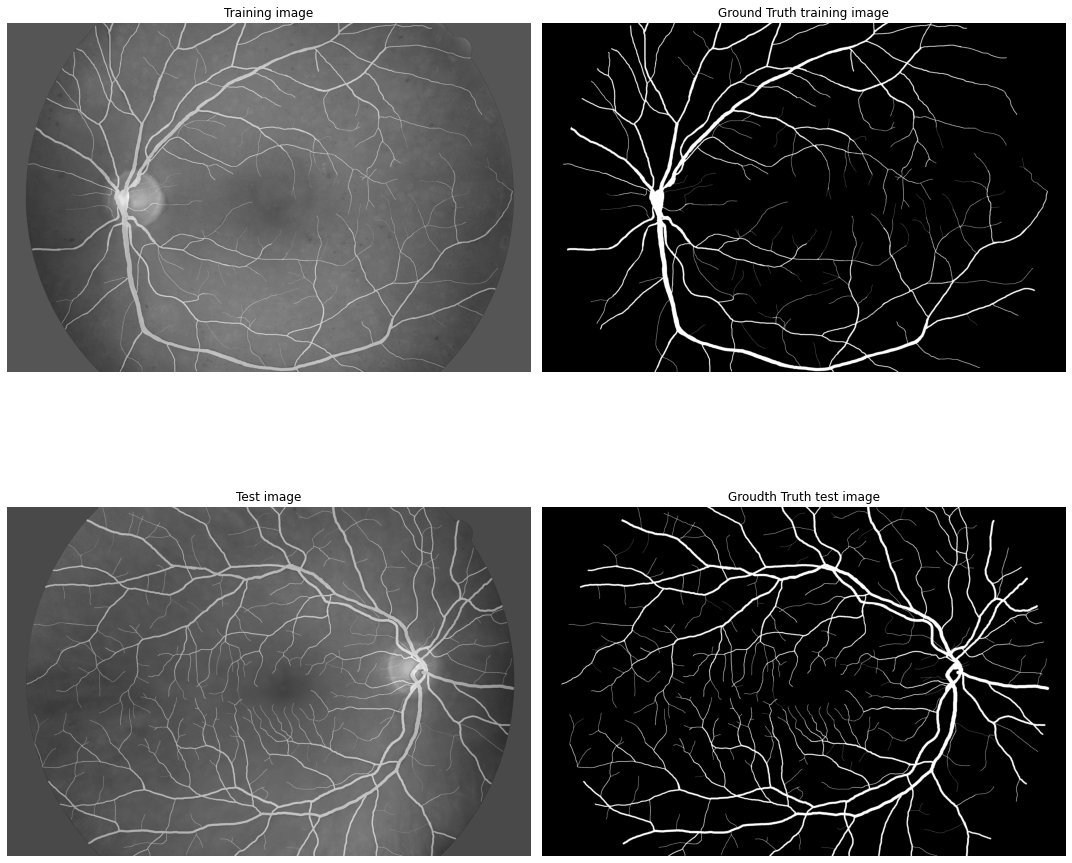

In [ ]:
import skimage as sk 
import matplotlib.pyplot as plt
from skimage import io
import os 
from matplotlib import gridspec

# Path of the folder in your google drive unit where you have the images:
path = '/content/drive/MyDrive/HSJD/Expert3d/Professional AI/TEST_IMAGES_EXPERT3D/'

I_train = sk.io.imread(os.path.join(path,'vessels_train.jpg')) 
I_train_GT = sk.io.imread(os.path.join(path,'vessels_train_GT.tif')) 
I_test = sk.io.imread(os.path.join(path,'vessels_test.jpg'))
I_test_GT = sk.io.imread(os.path.join(path,'vessels_test_GT.tif'))

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I_train, cmap=plt.cm.gray)
ax0.set_title('Training image')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_train_GT, cmap=plt.cm.gray)
ax1.set_title('Ground Truth training image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1,0])
ax2.imshow(I_test, cmap=plt.cm.gray)
ax2.set_title('Test image')
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,1])
ax3.imshow(I_test_GT, cmap=plt.cm.gray)
ax3.set_title('Groudth Truth test image')
ax3.set_axis_off()

plt.tight_layout()
plt.show()

## Unsupervised segmentation

- Otsu's algorithm


- K-means clustering


### Otsu's algorithm

As a reference, we will first apply well known segmentation approach Otsu's Method. The algorithm finds the threshold that **maximum inter-class variance** $\sigma _{b}^{2}(t)$, defined in terms of the difference between the means of the two clusters in the image histogram (pattern and background, respectively):

$\sigma _{b}^{2}(t)=\omega _{0}(t)\omega _{1}(t)\left[\mu _{0}(t)-\mu _{1}(t)\right]^{2}$ 

The algorithm is the following: 

1. Compute histogram and probabilities of each intensity level $p(i), i=0,\dots L$ where $L=2^n$ for an n-bit grayscale image.

2. Set up initial $\omega _{i}(0)$ and $\mu _{i}(0)$ 

3. Step through all possible thresholds $t=1,\ldots L-1$ 

a) Update $\omega _{i}$ and $\mu _{i}$


$\omega _{0}(t)=\sum _{i=0}^{t-1}p(i)$

$\omega _{1}(t)=\sum _{i=t}^{L-1}p(i)$

$\mu _{0}(t)={\frac {\sum _{i=0}^{t-1}ip(i)}{\omega _{0}(t)}}$

$\mu _{1}(t)={\frac {\sum _{i=t}^{L-1}ip(i)}{\omega _{1}(t)}}$

b) Compute $\sigma _{b}^{2}(t)=\omega _{0}(t)\omega _{1}(t)\left[\mu _{0}(t)-\mu _{1}(t)\right]^{2}$ 

4. Desired threshold corresponds to the maximum inter-class variance $\sigma _{b}^{2}(t)$ 

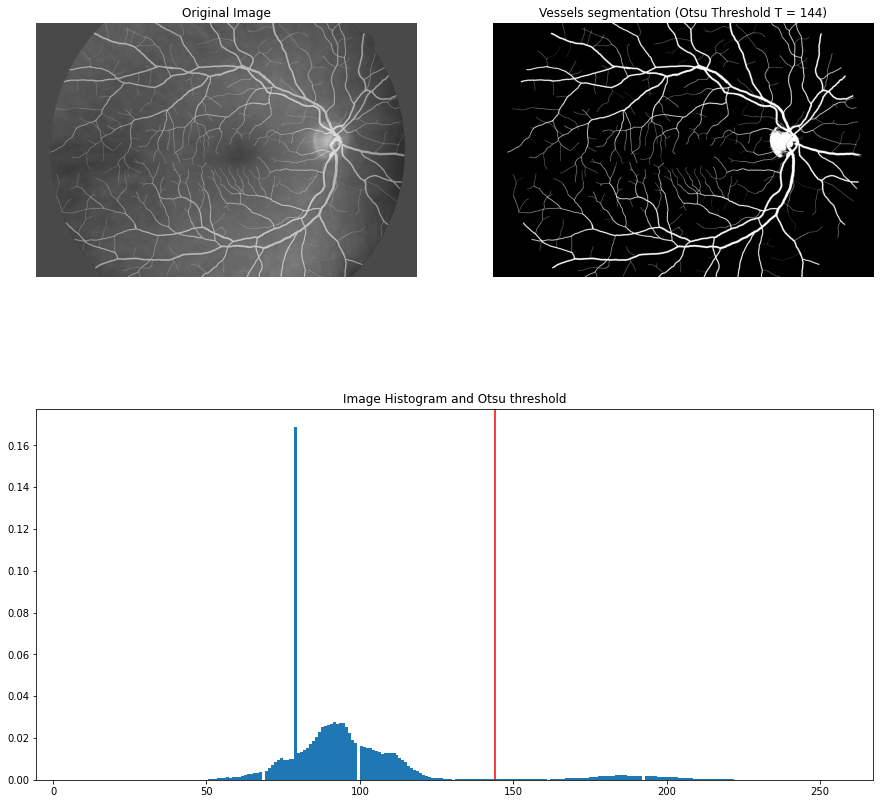

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.filters import threshold_otsu

# Find Otsu's threshold for training image:
threshold_otsu = threshold_otsu(I_train)

# Apply threshold to test image:
I_otsu = I_test >= threshold_otsu

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I_test, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_otsu, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Otsu Threshold T = {})'.format(threshold_otsu))
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,:])
ax3.hist(I_test.ravel(), bins=256,density=True)
ax3.axvline(threshold_otsu, color='r')
ax3.set_title('Image Histogram and Otsu threshold')
plt.show()

The peak in the histogram is due to the fact that the region outside circular lens has been previously replaced by the mean of the image.

### k-means algorithm

[1] Specify the number of clusters $k$ to be found in data.

[2] Set initial values for the cluster centroids $\mu^0_1,\dots,\mu^0_k$ (at random or prior knowledge). 

[3] Assign each observation to the nearest cluster (euclidean distance).

[4] Recompute the centroid of each cluster from the assigned observations $\mu^1_1,\dots,\mu^1_k$.

[5] Repeat steps 3-4 until no change in the centroids. Provide final clustering $\mu^n_1,\dots,\mu^n_k$, where $n$ is the number of iterations.

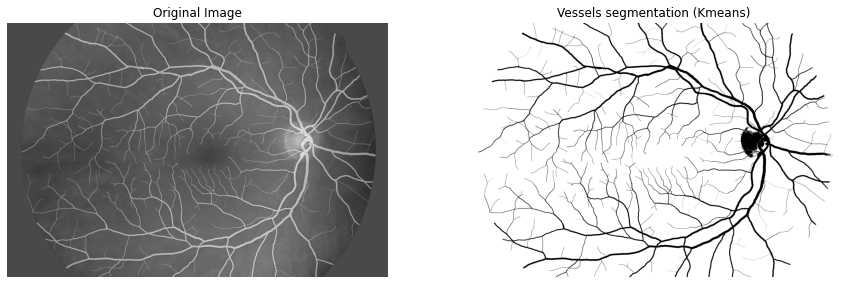

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# reshape training image as 1d array:
v_I_train = I_train.reshape(I_train.shape[0]*I_train.shape[1],1).astype(np.uint8) 

# Fit a Kmeans clustering model with two clusters using training image:
kmeans = KMeans(n_clusters=2, random_state=0).fit(v_I_train)

# Apply to predict test image:
v_I_test = I_test.reshape(I_test.shape[0]*I_test.shape[1],1).astype(np.uint8) # reshape image as 1d array

v_kmeans = kmeans.predict(v_I_test)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.array(v_kmeans).reshape(I_test.shape[0],I_test.shape[1]).astype(np.uint8) # Shape back result as image 

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I_test, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Kmeans)')
ax2.set_axis_off()

plt.show()

## Supervised segmentation


### Linear Discriminant Analysis (LDA)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


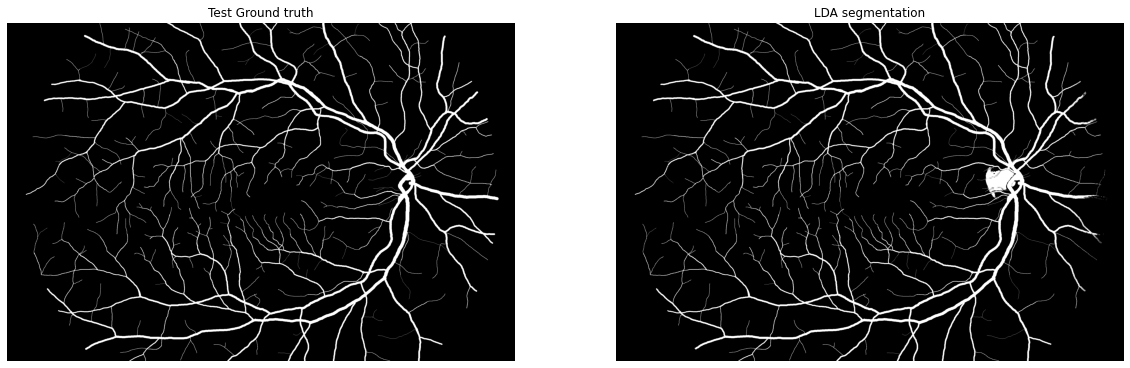

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

v_train_GT = I_train_GT.reshape(I_train_GT.shape[0]*I_train_GT.shape[1],1).astype(np.bool) 

lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(v_I_train, v_train_GT.ravel()) # Train with training image and training Ground Truth

# Predict the test image:
v_lda = lda_model.predict(v_I_test)
I_lda = np.array(v_lda).reshape(I_test.shape[0],I_test.shape[1]).astype(np.uint8) # Shape back result as image 

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(I_test_GT, cmap=plt.cm.gray)
ax[0].set_title('Test Ground truth')
ax[0].set_axis_off()

ax[1].imshow(I_lda, cmap=plt.cm.gray)
ax[1].set_title('LDA segmentation')
ax[1].set_axis_off()

plt.show()

## Performance evaluation


In order to evaluate a segmentation algorithm, we should introduce the following quantities:

- True positive (TP): A pattern pixel that has been correctly segmented as pattern
- True negative (TN): A background pixel that has been correctly segmented as background
- False positive (FP): A background pixel that has been mistakenly segmented as pattern (false alarm, Type I error)
- False negative (FN): A pattern pixel that has been mistakenly segmented as bavkground (omission, Type II error)

The confusion matrix is a 2x2 matrix reporting these four values: TP,TNFP,FN. 

From them we can define different measures of error: 

- Sensitivity, recall, hit rate, or true positive rate (TPR):

$\text{TPR} =\frac{TP}{TP+FN}$

- Specificity, selectivity or true negative rate (TNR):

$\text{TNR} =\frac{TN}{TN+FP}$

- The Sorensen-Dice similarity index: 

Measures the similarity between a segmentation mask and the ground truth mask by computing the F1 score
is the harmonic mean of precision and sensitivity:

$\text{DSC}={\frac {2TP}{2TP+FP+FN}}$.

In [ ]:
from sklearn.metrics import confusion_matrix

v_test_GT = I_test_GT.reshape(I_test_GT.shape[0]*I_test_GT.shape[1],1).astype(np.bool) 

CM_lda = confusion_matrix(v_test_GT,np.array(v_lda).astype(np.bool))
tn, fp, fn, tp = CM_lda.ravel()
TPR_lda = tp/(tp+fn)
FPR_lda = fp/(fp+tn)
DSC_lda = 2*tp/(2*tp+fp+fn)

print('LDA Segmentation: TPR={}, FPR={}, DSC={}'.format(TPR_lda,FPR_lda,DSC_lda))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


LDA Segmentation: TPR=0.9831237035089258, FPR=0.003014646271029858, DSC=0.970905651428659


In [ ]:
CM_lda

array([[7614687,   23025],
       [   9242,  538390]])

# 4. Extraction of Regional features

Quantitative characterization of an image requires the extraction of relevant regional properties of the image. This process is known as **feature extraction**.

There are several feature extraction apporoaches and in this session we are going to cover the most important ones: 

- Basic regional properties: Based on region shape, intensity, color, size, etc.

- Advanced regional properties (texture analysis): Based on statistical properties of the distribution of pixels in the region: Homogeneity, entropy, uniformity, etc. 

Let's get started. 

## Simple example: Artificial blobs

We want to generate an image with artificial blobs:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


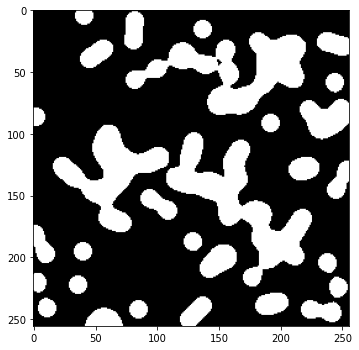

In [ ]:
from skimage import data, measure
import skimage as sk 
import matplotlib.pyplot as plt

blobs = data.binary_blobs(length=256, blob_size_fraction=0.1,volume_fraction=0.3)
IG = sk.color.rgb2gray(blobs) 

fig = plt.figure(figsize=(5,5))
plt.imshow(IG,cmap='gray')
plt.tight_layout()
plt.show()

Segment, labelling regions and visualization: 

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  # This is added back by InteractiveShellApp.init_path()


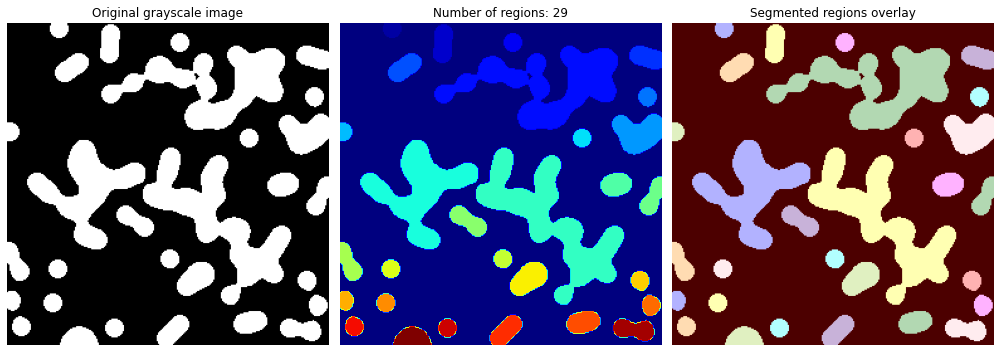

In [ ]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image') 
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay') 

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

Get the properties using pandas dataframe:

In [ ]:
import pandas as pd

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent'])

df_propietats = pd.DataFrame(props)
df_propietats.head()


label  area  eccentricity    extent
0      1   152      0.588900  0.844444
1      2   411      0.874139  0.828629
2      3   177      0.000000  0.786667
3      4  4111      0.902767  0.420262
4      5   383      0.805313  0.775304

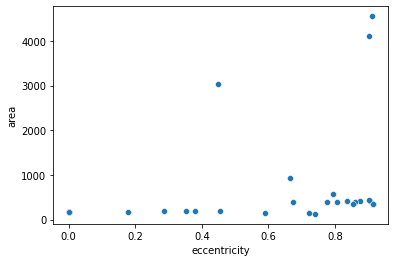

In [ ]:
import seaborn as sns

sns.scatterplot(x='eccentricity',y='area',data=df_propietats)

## Advanced example: Matches

### Step 1: Segmentation and labeling

In all regional feature extraction methods we should start from a semgented image with labelled regions or objects in an image:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


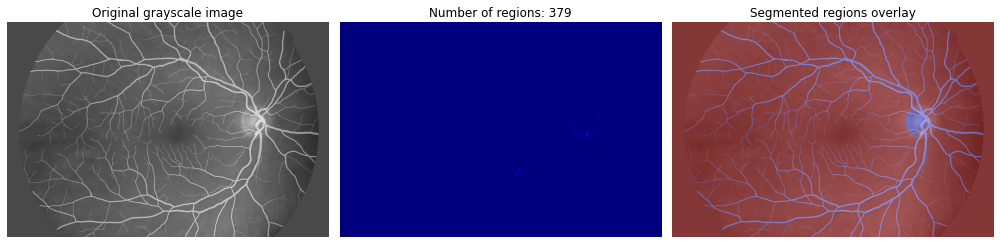

In [ ]:
import matplotlib.pyplot as plt
import skimage as sk 
from skimage import io

from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

I = sk.io.imread('/content/drive/MyDrive/HSJD/Expert3d/Professional AI/TEST_IMAGES_EXPERT3D/vessels_test.jpg') # read image using imread function
IG = sk.color.rgb2gray(I) # Convert RGB image to grayscale

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image') 
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay') 

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

### Step 2: Obtain regional properties: 

Let's obtain the basic regional properties using the function regionprops: 

In [ ]:
from skimage.measure import regionprops
import numpy as np 

props = regionprops(label_image)

Let's take a look to some of the available properties: For instance, for the region labelled as region 1 we have the following properties: 

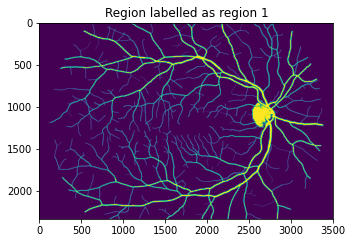

Area of Region 1: 583835 pixels
Centroiod of Region 1: (1139.7968381477644, 1991.8602190687438) 
Eccentricity of Region 1: 0.6276012659476427
Major Axis Length of Region 1: 3188.2858342856325 pixels
Minor Axis Length of Region 1: 2482.191916971979 pixels
Perimeter of Region 1: 147510.8928141412 pixels
Orientation of Region 1: -1.4949212273837984 degrees


In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(label_image==1)
ax.set_title('Region labelled as region 1') # set figure title
plt.tight_layout()
plt.show()

print('Area of Region 1: {} pixels'.format(props[0].area))
print('Centroiod of Region 1: {} '.format(props[0].centroid))
print('Eccentricity of Region 1: {}'.format(props[0].eccentricity))
print('Major Axis Length of Region 1: {} pixels'.format(props[0].major_axis_length))
print('Minor Axis Length of Region 1: {} pixels'.format(props[0].minor_axis_length))
print('Perimeter of Region 1: {} pixels'.format(props[0].perimeter))
print('Orientation of Region 1: {} degrees'.format(props[0].orientation))

The complete list of basic properties with a detailed description of their meaning can be found in https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

### Step 3: Inspection of the regions: 

There are clearly too many regions (45), we shoud discard those correspoding to little sporious artefacts in the image. This becomes evident when we print the area itereting over regions. Note that the region number 1 is saved in props[0]. 

In [ ]:
for ireg in range(0,nregions):
    print('Area of region {} is = {} pixels'.format(ireg+1, props[ireg].area))

Area of region 1 is = 583835 pixels
Area of region 2 is = 1 pixels
Area of region 3 is = 1 pixels
Area of region 4 is = 1 pixels
Area of region 5 is = 1 pixels
Area of region 6 is = 1 pixels
Area of region 7 is = 1 pixels
Area of region 8 is = 1 pixels
Area of region 9 is = 1 pixels
Area of region 10 is = 1 pixels
Area of region 11 is = 1 pixels
Area of region 12 is = 1 pixels
Area of region 13 is = 1 pixels
Area of region 14 is = 1 pixels
Area of region 15 is = 1 pixels
Area of region 16 is = 1 pixels
Area of region 17 is = 1 pixels
Area of region 18 is = 1 pixels
Area of region 19 is = 1 pixels
Area of region 20 is = 4 pixels
Area of region 21 is = 1 pixels
Area of region 22 is = 3 pixels
Area of region 23 is = 1 pixels
Area of region 24 is = 1 pixels
Area of region 25 is = 2 pixels
Area of region 26 is = 2 pixels
Area of region 27 is = 1 pixels
Area of region 28 is = 1 pixels
Area of region 29 is = 2 pixels
Area of region 30 is = 1 pixels
Area of region 31 is = 1 pixels
Area of regi

It is obvious that regions with an area of few pixels should be considered as spourious artefacts of the segmentation. A reliable way of inspecting regional features is to represent the histogram of the features: 

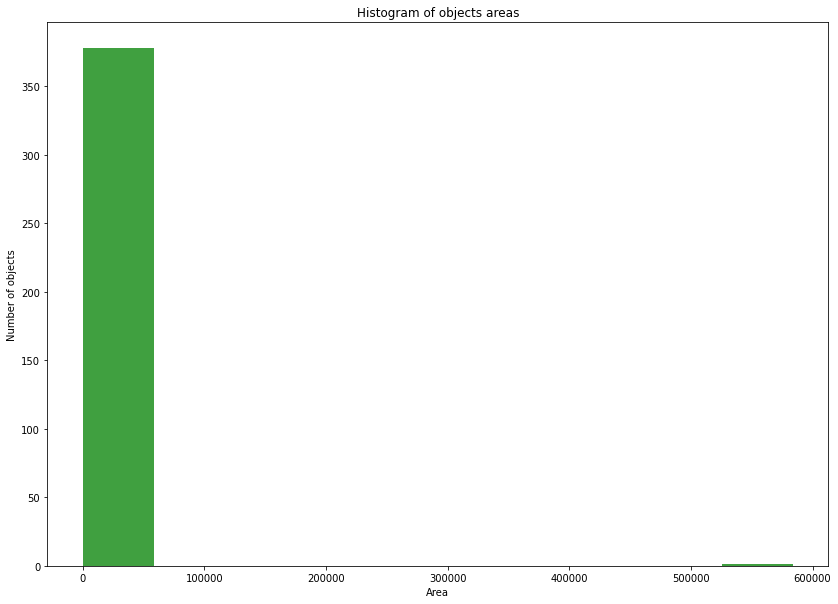

In [ ]:
import numpy as np 

area = np.zeros(nregions)
for i in range(0,nregions):
    area[i] = props[i].area
   
# Plot histogram of the areas
fig = plt.figure(figsize=(14, 10))
n, bins, patches = plt.hist(area, density=False, facecolor='g', alpha=0.75)

plt.xlabel('Area')
plt.ylabel('Number of objects')
plt.title('Histogram of objects areas')
plt.show()

Further inspection reveals that there are indeed around 32 objects with small area 13 with large areas. We now identify which small regions correspond to spourious artefacts presenting small areas below 3000 pixels:

In [ ]:
ind_large = np.where(area > 3000)
ind_lregions = np.array(ind_large)+1 #Note: region 1 is placed in component 0 or the props variable
area_large = area[ind_large]
print('There are {} large objects'.format(len(area_large)))
print('Large objects correspond to regions: {}'.format(ind_lregions))
print('The areas of the large objects are: {}'.format(area_large))

ind_small = np.where(area < 3000)
area_small = area[ind_small]
ind_sregions = np.array(ind_small)+1
print('There are {} small objects'.format(len(area_small)))
print('Small objects correspond to regions: {}'.format(ind_sregions))
print('The areas of the small objects are {}'.format(area_small))

There are 1 large objects
Large objects correspond to regions: [[1]]
The areas of the large objects are: [583835.]
There are 378 small objects
Small objects correspond to regions: [[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
   20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
   38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
   56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
   74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
   92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
  110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
  128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
  146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
  164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
  182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
  200 

For instance, the corresporing properties looks like this:

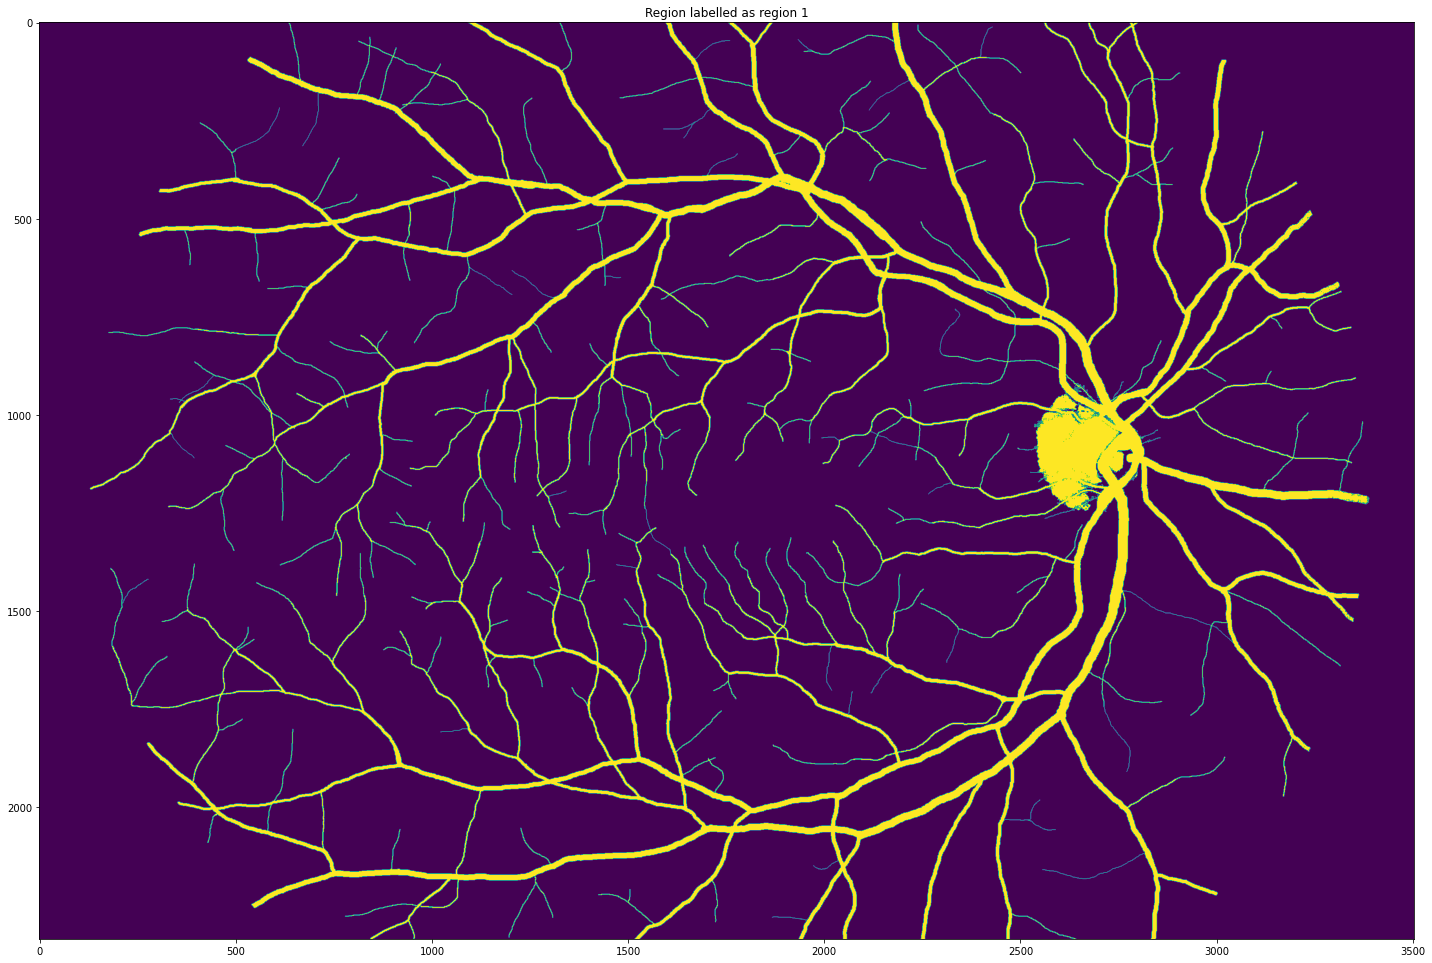

Area of Region: 1 pixels
Centroiod of Region: (474.0, 1999.0) 
Eccentricity of Region: 0
Major Axis Length of Region: 0.0 pixels
Minor Axis Length of Region: 0.0 pixels
Perimeter of Region: 0.0 pixels
Orientation of Region: 0.7853981633974483 degrees


In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(label_image==1)
ax.set_title('Region labelled as region 1') # set figure title
plt.tight_layout()
plt.show()

print('Area of Region: {} pixels'.format(props[1].area))
print('Centroiod of Region: {} '.format(props[1].centroid))
print('Eccentricity of Region: {}'.format(props[1].eccentricity))
print('Major Axis Length of Region: {} pixels'.format(props[1].major_axis_length))
print('Minor Axis Length of Region: {} pixels'.format(props[1].minor_axis_length))
print('Perimeter of Region: {} pixels'.format(props[1].perimeter))
print('Orientation of Region: {} degrees'.format(props[1].orientation))

### Step 4: Removal of spourious regions: 

Let's remove small objects from the labelled image so that we can work only with relevant objects in the image:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """


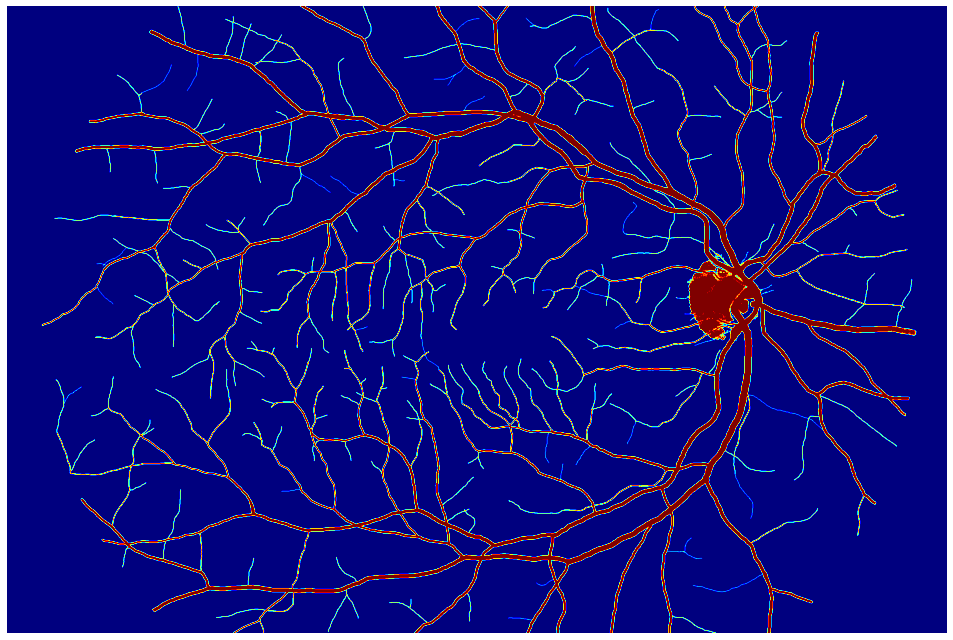

In [ ]:
for i in np.squeeze(ind_small): # loop over small (spourious) regions
    iregion = i+1
    label_image[label_image==iregion]=0 # set spourious region as background by re-labelling as zero
    
image_label_overlay = label2rgb(label_image, image=IG) # generate again the colormap assignment

fig, ax = plt.subplots(figsize=(14, 9))
ax.imshow(label_image,cmap=plt.cm.jet)
ax.set_axis_off()
plt.tight_layout()
plt.show()

### Step 5: Obtain final region properties: 
Represent the **centroid and bounding box** of each object in the image:

The number of final regions is 1


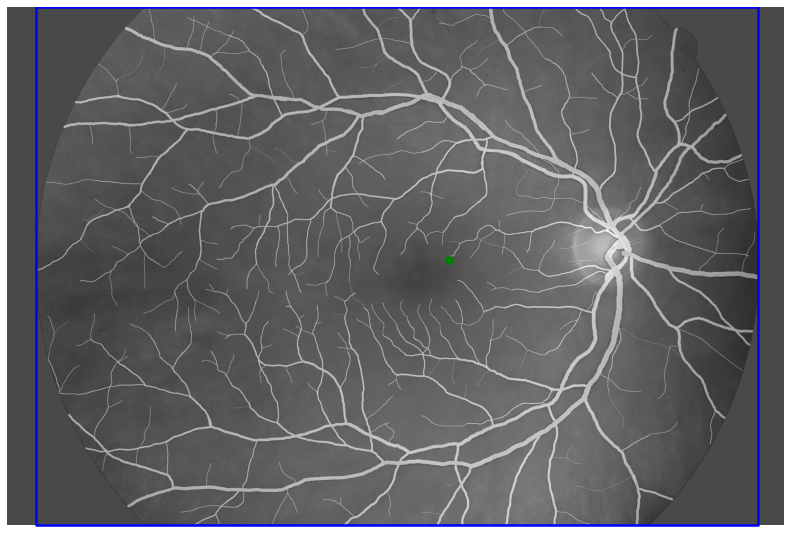

In [ ]:
from skimage.measure import regionprops
import math

props = regionprops(label_image) # Obain again the properties after removal of spourious regions
print('The number of final regions is {}'.format(len(props)))

fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(IG, cmap=plt.cm.gray)

for p in props:
    y0, x0 = p.centroid
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = p.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.set_axis_off()
plt.show()

## Advanced features: Texture and entropy

### Texture-based regional properties:

Understanding the gray-level co-ocurrence matrix:

Each component of the co-ocurrence matrix g[i,j,d,theta] represents the number of times that grey-level j occurs at a distance d and at an angle theta from grey-level i:

In [ ]:
from skimage.feature import greycomatrix

image = np.array([[0, 0, 1, 1],[0, 0, 1, 1],[0, 2, 2, 2],[2, 2, 3, 3]], dtype=np.uint8)
g = greycomatrix(image, [1], [0], levels=4, normed=False, symmetric=False)
print(image)
print('Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,0,0,0]))
print('Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,1,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,2,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,0,0,0]))

[[0 0 1 1]
 [0 0 1 1]
 [0 2 2 2]
 [2 2 3 3]]
Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): 2
Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): 2
Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): 3
Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): 0


Once we have the GLCM we can compute the different texture properties:

Compute a feature of a grey level co-occurrence matrix to serve as a compact summary of the matrix. The properties are computed as follows:

- 'contrast': $\sum_{i,j=0}^{levels-1} P_{i,j}(i-j)^2$

- 'dissimilarity': $\sum_{i,j=0}^{levels-1}P_{i,j}|i-j|$

- 'homogeneity': $\sum_{i,j=0}^{levels-1}\frac{P_{i,j}}{1+(i-j)^2}$

- 'ASM': $\sum_{i,j=0}^{levels-1} P_{i,j}^2$

- 'energy':$\sqrt{ASM}$

- 'correlation': $\sum_{i,j=0}^{levels-1} P_{i,j}\left[\frac{(i-\mu_i) (j-\mu_j)}{\sqrt{(\sigma_i^2)(\sigma_j^2)}}\right]$

   

1. Obtain the gray-level co-ocurrence matrix of each of the regions in the image:

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data

props = regionprops(label_image,intensity_image=IG) # Obain again the properties after removal of spourious regions

nregions = len(props)
   
iregion = 0
props_texture = np.zeros((nregions,5))
for p in props:
    minr, minc, maxr, maxc = p.bbox
    I = IG[minc:maxc,minr:maxr]
    g = greycomatrix(I, [1], [0], levels=None, normed=True, symmetric=True)
    contrast = greycoprops(g, 'contrast')
    dissimilarity = greycoprops(g, 'dissimilarity')
    homogeneity = greycoprops(g, 'homogeneity')
    energy = greycoprops(g, 'energy')
    correlation = greycoprops(g, 'correlation')

    props_texture[iregion,0] = contrast
    props_texture[iregion,1] = dissimilarity
    props_texture[iregion,2] = homogeneity
    props_texture[iregion,3] = energy
    props_texture[iregion,4] = correlation

    iregion = iregion + 1 

# Export all features as a Pandas dataframe:
import pandas as pd
df = pd.DataFrame(props_texture,columns=['Contrast', 'dissimilarity','homogeneity','energy','correlation'])
df.to_excel("Texture_features.xlsx") 
df


Contrast  dissimilarity  homogeneity    energy  correlation
0  123.930982       2.497558     0.742972  0.144176     0.909725

### Shannon's entropy:

**Shannon's entropy and information of a signal**

In physics, entropy is a measure of the disorder of a system: 

Boltzmann's entropy equation $S = k_B \log W$ where $k_B = 1.3807 \times 10^{-23}$ J/K is the Boltzmann's constant and $W$ is the number of dynamical configutations of a physical system (positions and velocities of the particles in a gas, for instance). 


Shannon's entropy: 

In computer science we can extend the concept of entropy by defining a set of states ${a_0,a_1,\dots,a_n}$ with a probability of occurence in a certain message given by ${p_0,p_1,\dots,p_n}$. 

In the case of a digital image, the states will correspond to grayscale levels of a pixel in an image and therefore ina n-bit grayscale image we have ${a_0,a_1,\dots,a_n} = {0,1,\dots,2^n-1}$. The histogram of the image will tell us the probability of each intensity levels ${p_0,p_1,\dots,p_n}$. 

Shannon's entroy is defined as: 

### $H = -\sum_{i=1}^n p_i \log_2(p_i)$ (bits)


Let's consider some cases as examples: 


- **Image with a constant histogram**: Equal probability of occurrence of all intensity levels ${p_0=1/n,p_1=1/n,p_2=1/n,p_3=1/n \dots,p_n=1/n}$ and therefore the maximum possible Shannon's entropy $H=n$ bits. Such image can not be compressed and n bits are required in order to represent the intensity levels of the image. 


- **Binary image with half of the pixels with an intensity level of 0 and half with an intensity level of 1:** In this case we have a histogram ${p_0=0.5,p_1=0.5,p_2=0,p_3=0\dots,p_n=0}$. This image will have a Shannon's entropy of $H=1$ bits since only 1 bit is required to represent the intensity levels of the pixels.


- **Binary image of N pixels with all pixels with an intensity level of 0 except one pixel with an intensity level of 1:** In this case we have a histogram ${p_0=(N-1)/N,p_1=1/N,p_2=0,p_3=0\dots,p_n=0}$. This image will have a Shannon's entropy of $H\sim 0$ bits because we need much less than 1 bit to represent the intensity levels of the pixels (most of them are zero anyway).

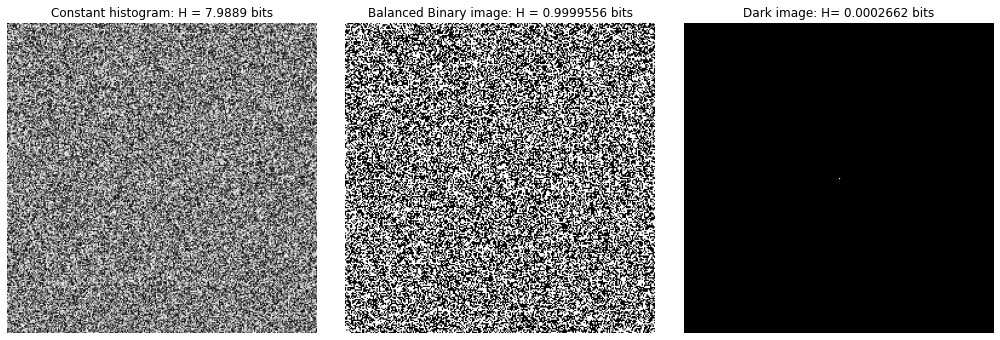

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Image with constant histogram:
I1 = np.random.randint(256,size=(256,256))

# Obtain probability of ocurrence of each grayscale level from image histogram:
v = I1.flatten() # Flatten image as row vector:
probg,edges = np.histogram(v,bins=np.arange(256), density=True)
eps = 1e-16
# Compute Shannon's entropy:
probg = probg + eps
H1 = -np.sum(probg * np.log2(probg), axis=0) 

# 2. Binary image with half of the pixels 0 and half 1:
I2 = np.random.randint(2,size=(256,256))

# Obtain probability of ocurrence of each grayscale level from image histogram:
v = I2.flatten() # Flatten image as row vector:
probg,edges = np.histogram(v,bins=np.arange(256), density=True)
eps = 1e-16
# Compute Shannon's entropy:
probg = probg + eps
H2 = -np.sum(probg * np.log2(probg), axis=0) 

# 3. Binary image with half of the pixels 0 and half 1:
I3 = np.zeros((256,256))
I3[128,128]=1
# Obtain probability of ocurrence of each grayscale level from image histogram:
v = I3.flatten() # Flatten image as row vector:
probg,edges = np.histogram(v,bins=np.arange(256), density=True)
eps = 1e-16
# Compute Shannon's entropy:
probg = probg + eps
H3 = -np.sum(probg * np.log2(probg), axis=0) 

fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(I1,cmap=plt.cm.gray)
ax[0].set_title('Constant histogram: H = {0:1.4f} bits'.format(H1)) 
ax[1].imshow(I2,cmap=plt.cm.gray)
ax[1].set_title('Balanced Binary image: H = {0:1.7f} bits'.format(H2)) 
ax[2].imshow(I3,cmap=plt.cm.gray)
ax[2].set_title('Dark image: H= {0:1.7f} bits'.format(H3)) 

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()


#### Entropy of regions: 

Compute entropy of the different objects in the previous segmentation example:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

iregion = 0
entropy = np.zeros(nregions)
for p in props:
    minr, minc, maxr, maxc = p.bbox
    I = IG[minc:maxc,minr:maxr]
    v = I.flatten() # Flatten image as row vector:
    # Probability of ocurrence of each grayscale level
    probg,edges = np.histogram(v,bins=np.arange(256), density=True)
    eps = 1e-16
    probg = probg + eps
    H = -np.sum(probg * np.log2(probg), axis=0) # Compute Shannon's entropy
    entropy[iregion] = H
    iregion = iregion + 1 

print('Entropy of the objects: {}'.format(entropy))

Entropy of the objects: [5.70873325]


### Comparing texture features and Shannon's entropy: 

Comparing the contrast (obtained from the co-ocurrence matrix) and the Shannon's entropy, 
we observe that regions with a smaller contrast present a decrease in the Shannon's entroppy and therefore can be easily compressed by encoding their pixels with a lower number of bits. 

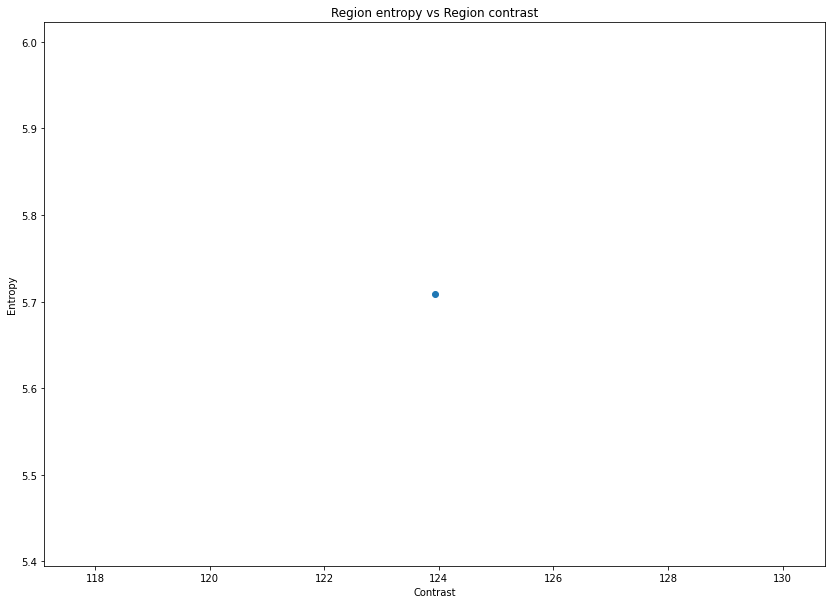

In [ ]:
fig = plt.figure(figsize=(14, 10))
plt.scatter(props_texture[:,0], entropy)
plt.ylabel('Entropy')
plt.xlabel('Contrast')
plt.title("Region entropy vs Region contrast")
plt.show()

### Exercise: Entropy of medical images

Mammograph:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


Shannon =5.429816779047806
Entropy = 5.429816779048143
Shannon entropy=5.429816779047806 bits/pixel
Pneumo:
Shannon =7.351356084593248
Entropy = 7.347533368400047
Shannon entropy=7.351356084593248 bits/pixel
Vessels:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


Shannon =5.846832057793294
Entropy = 5.846805282572226
Shannon entropy=5.846832057793294 bits/pixel
Maximum Entropy = 8.0 bits/pixel


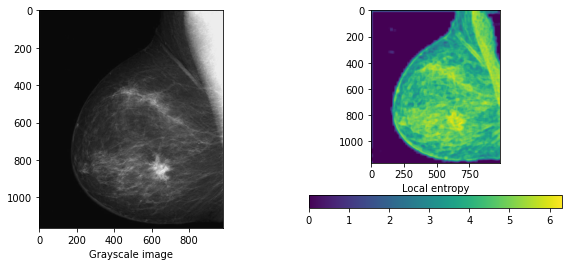

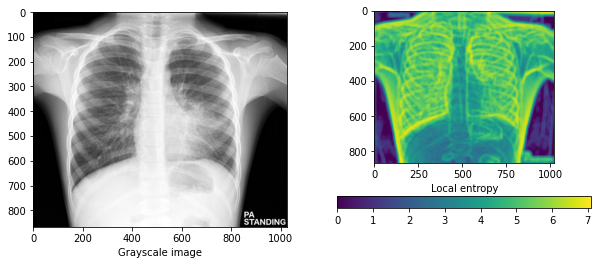

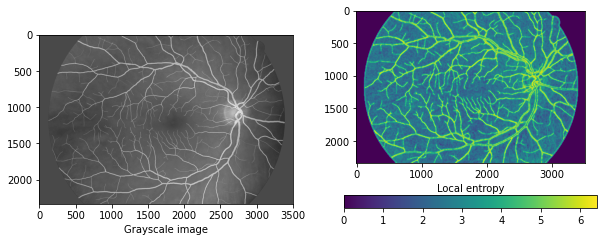

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte
from skimage.measure import shannon_entropy
import skimage as sk 

def entropy_image(imgG):

    img = img_as_ubyte(imgG) # convert to uint8

# Local entropy in a certain pixel neiborhood:
    entr_img = entropy(img, np.ones((21,21)))
    shannon_img = shannon_entropy(img)
    print('Shannon ={}'.format(shannon_img))
# Flatten the image (convert from matrix to vector):
    v = img.flatten()
# For each grayscale leve, get the pixel probability of occurrence:
    probg,edges = np.histogram(v,bins=np.arange(256), density=True)
    eps = 1e-16
    probg = probg + eps
# Compute Shannon's entropy:
    H_noise = -np.sum(probg * np.log2(probg), axis=0)
# Compare: 
    print('Entropy = {}'.format(H_noise))

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax1.imshow(img, cmap='gray')
    ax1.set_xlabel("Grayscale image")
    h1 = ax2.imshow(entr_img, cmap='viridis')
    ax2.set_xlabel("Local entropy")
    fig.colorbar(h1,ax=ax2,orientation='horizontal') # visualize colorbar 
    return entr_img,shannon_img

# Open access images downloaded with permission from: 
# https://images.nga.gov

print('Mammograph:')
imgC = sk.io.imread('/content/drive/MyDrive/HSJD/Expert3d/Professional AI/TEST_IMAGES_EXPERT3D/mammograph.tif') # read image using imread function
imgG = sk.color.rgb2gray(imgC)
IE,shannon = entropy_image(imgG)
print('Shannon entropy={} bits/pixel'.format(shannon))

print('Pneumo:')
imgC = sk.io.imread('/content/drive/MyDrive/HSJD/Expert3d/Professional AI/TEST_IMAGES_EXPERT3D/pneumo.jpg') # read image using imread function
imgG = sk.color.rgb2gray(imgC)
IE,shannon = entropy_image(imgG)
print('Shannon entropy={} bits/pixel'.format(shannon))

print('Vessels:')
imgC = sk.io.imread('/content/drive/MyDrive/HSJD/Expert3d/Professional AI/TEST_IMAGES_EXPERT3D/vessels_test.jpg') # read image using imread function
imgG = sk.color.rgb2gray(imgC)
IE,shannon = entropy_image(imgG)
print('Shannon entropy={} bits/pixel'.format(shannon))

# Maximum entropy: An image with equal probabilities for each grayscale level:
nsymbols = np.power(2,8) 
prob_equal = (1/nsymbols)*np.ones(nsymbols)
H_max = -np.sum(prob_equal * np.log2(prob_equal), axis=0)
print('Maximum Entropy = {} bits/pixel'.format(H_max))